<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Frecuencias-Nubes de Palabras  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

**Objetivo de la sesión:**

En esta sección introducimos algunos elementos del preprocesamiento de textos:
- Frecuencias de palabras
- Nubes de palabras
- Expresiones regulares
- Tokenización

Estos últimos conceptos son fundamentales en el proceso de la normalización y limpieza de texto.

In [43]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

<FONT SIZE=5 COLOR="purple"> 1. GUÍA INTRODUCTORIA </FONT>

Para motivar la discusión y abordaje de los conceptos de esta sesión. Vamos a seguir la siguiente guía.

- Complete el código que aparece debajo de cada pregunta.

1.1 Seleccione un par de párrafos de alguna fuente e internet de un tema que le interese y coloquelo en la variable *texto*

In [11]:
url = "https://www.sabermas.umich.mx/archivo/articulos/185-numero-2311/357-ide-donde-viene-tu-perro-el-origen-de-los-perros-domesticos.html"
req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
response = urllib.request.urlopen(req)
html_content = response.read()
soup = BeautifulSoup(html_content, 'lxml')
paragraphs = soup.find_all('p')
texto = ""
for i, paragraph in enumerate(paragraphs):
    if i < 4:
        texto += paragraph.text + "\n"
print(texto)


Los perros son los animales domésticos ubicuos por excelencia. Han estado presentes en el mundo humano desde hace tanto tiempo, que pocas veces nos detenemos a preguntarnos sobre su origen. Las culturas más antiguas conocidas ya tenían perros, tal y como atestiguan sus vestigios arqueológicos. Hay grabados de perros procedentes de civilizaciones Mesopotámicas con más de 12,000 años de antigüedad y en todas las civilizaciones antiguas se conocen perros domésticos, algunos compañeros de caza otros, hechos dioses. Y no sólo están representados en arte antiguo y los mitos, también hay restos arqueológicos de perros que anteceden a la agricultura y por ende, al sedentarismo. El más viejo conocido es el perro de Altai descubierto en la cueva Razboinichya, ubicada al sur de Siberia, Rusia, con 33,000 años de antigüedad.

Toda la vida en la tierra evoluciona y todas las formas de vida tienen un ancestro ¿cuál es el ancestro del perro? Gracias a estudios anatómicos, de conducta, de química san

1.2 ¿Cuántos carácteres tiene la variable texto?

In [13]:
longitud = len(texto)
print(longitud)

3110


1.3 ¿Cuál es la función que convierte toda la cadena de texto a minúsculas? ¿Por qué considera que se debe hacer esto en el procesamiento de texto?

In [14]:
texto_minuscula = texto.lower()
print(texto_minuscula)


los perros son los animales domésticos ubicuos por excelencia. han estado presentes en el mundo humano desde hace tanto tiempo, que pocas veces nos detenemos a preguntarnos sobre su origen. las culturas más antiguas conocidas ya tenían perros, tal y como atestiguan sus vestigios arqueológicos. hay grabados de perros procedentes de civilizaciones mesopotámicas con más de 12,000 años de antigüedad y en todas las civilizaciones antiguas se conocen perros domésticos, algunos compañeros de caza otros, hechos dioses. y no sólo están representados en arte antiguo y los mitos, también hay restos arqueológicos de perros que anteceden a la agricultura y por ende, al sedentarismo. el más viejo conocido es el perro de altai descubierto en la cueva razboinichya, ubicada al sur de siberia, rusia, con 33,000 años de antigüedad.

toda la vida en la tierra evoluciona y todas las formas de vida tienen un ancestro ¿cuál es el ancestro del perro? gracias a estudios anatómicos, de conducta, de química san

Al convertir todo el texto a minúsculas, aseguramos que todas las palabras que están escritas de diferentes formas (mayúsculas o minúsculas) se conviertan a una forma uniforme. Esto facilita la comparación y búsqueda de palabras en el texto, permitiendo reducir la complejidad del análisis y asegurar búsquedas efectivas.

1.4 ¿ Que función permite separar la cadena de texto en expresiones más pequeñas?

In [18]:
lista_texto = texto_minuscula.split()
print(lista_texto)

['los', 'perros', 'son', 'los', 'animales', 'domésticos', 'ubicuos', 'por', 'excelencia.', 'han', 'estado', 'presentes', 'en', 'el', 'mundo', 'humano', 'desde', 'hace', 'tanto', 'tiempo,', 'que', 'pocas', 'veces', 'nos', 'detenemos', 'a', 'preguntarnos', 'sobre', 'su', 'origen.', 'las', 'culturas', 'más', 'antiguas', 'conocidas', 'ya', 'tenían', 'perros,', 'tal', 'y', 'como', 'atestiguan', 'sus', 'vestigios', 'arqueológicos.', 'hay', 'grabados', 'de', 'perros', 'procedentes', 'de', 'civilizaciones', 'mesopotámicas', 'con', 'más', 'de', '12,000', 'años', 'de', 'antigüedad', 'y', 'en', 'todas', 'las', 'civilizaciones', 'antiguas', 'se', 'conocen', 'perros', 'domésticos,', 'algunos', 'compañeros', 'de', 'caza', 'otros,', 'hechos', 'dioses.', 'y', 'no', 'sólo', 'están', 'representados', 'en', 'arte', 'antiguo', 'y', 'los', 'mitos,', 'también', 'hay', 'restos', 'arqueológicos', 'de', 'perros', 'que', 'anteceden', 'a', 'la', 'agricultura', 'y', 'por', 'ende,', 'al', 'sedentarismo.', 'el', 'm

1.5 ¿Cuál es la longitud de *lista_texto*? Interprete ese valor

In [20]:
long_lista = len(lista_texto)
print(long_lista)

514


Eso me indica que a pezar de que el texto tenga 3310 caracteres, realmente esta utilizando solo 514 palabras.

1.6 Haga una tabla de frecuencias con lista_texto

In [30]:
frecuencias = defaultdict(int)

for palabra in lista_texto:
    frecuencias[palabra] += 1

print(dict(frecuencias))

{'los': 12, 'perros': 8, 'son': 3, 'animales': 1, 'domésticos': 1, 'ubicuos': 1, 'por': 3, 'excelencia.': 1, 'han': 1, 'estado': 1, 'presentes': 1, 'en': 7, 'el': 15, 'mundo': 1, 'humano': 1, 'desde': 1, 'hace': 4, 'tanto': 1, 'tiempo,': 2, 'que': 18, 'pocas': 1, 'veces': 2, 'nos': 2, 'detenemos': 1, 'a': 8, 'preguntarnos': 1, 'sobre': 1, 'su': 2, 'origen.': 1, 'las': 5, 'culturas': 1, 'más': 8, 'antiguas': 3, 'conocidas': 1, 'ya': 2, 'tenían': 1, 'perros,': 1, 'tal': 1, 'y': 17, 'como': 4, 'atestiguan': 1, 'sus': 2, 'vestigios': 1, 'arqueológicos.': 1, 'hay': 2, 'grabados': 1, 'de': 38, 'procedentes': 1, 'civilizaciones': 2, 'mesopotámicas': 1, 'con': 3, '12,000': 1, 'años': 3, 'antigüedad': 1, 'todas': 2, 'se': 4, 'conocen': 1, 'domésticos,': 1, 'algunos': 1, 'compañeros': 1, 'caza': 1, 'otros,': 1, 'hechos': 1, 'dioses.': 1, 'no': 5, 'sólo': 1, 'están': 1, 'representados': 1, 'arte': 1, 'antiguo': 2, 'mitos,': 1, 'también': 1, 'restos': 1, 'arqueológicos': 1, 'anteceden': 1, 'la': 1

1.7 Realice una gráfica que represente la tabla de frecuencias tomando el top 10 de las palabras que más se repiten.

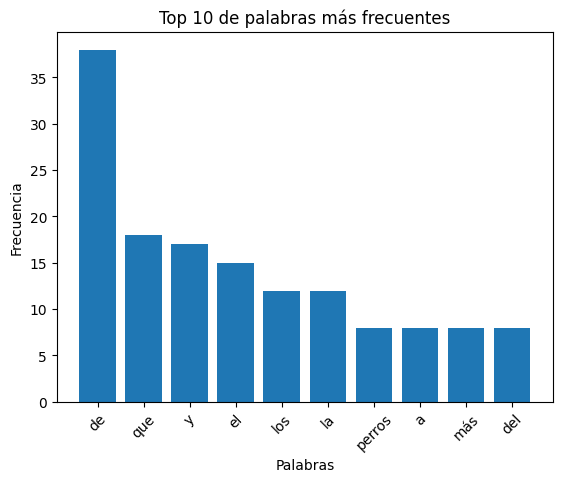

In [31]:
top_palabras = dict(sorted(frecuencias.items(), key=lambda item: item[1], reverse=True)[:10])

plt.bar(top_palabras.keys(), top_palabras.values())
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 de palabras más frecuentes')
plt.xticks(rotation=45)
plt.show()

1.8 ¿Qué puede observar de esta tabla de frecuencias? ¿Qué tipo de palabras fueron las que más se repitieron?

**Respuesta:**

 Las palabras que más se repiten generalmente son preposiciones, conjunciones y artículos, conectores textuales al final del día. Estas palabras desempeñan un papel fundamental en la estructura y cohesión del discurso. Lo que hace que se repitan más que las demás palabras.

1.9 Trate de eliminar alguna de estas palabras. Por ejemplo, colocando una restricción sobre el número de carácteres de las palabras y de nuevo haga la tabla de frecuencias y el gráfico de barras del top 10 de las palabras que más se repiten.

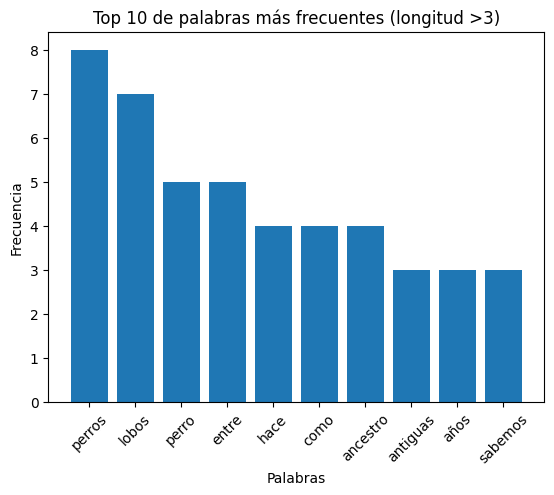

In [41]:
palabras_filtradas = [palabra for palabra in lista_texto if len(palabra) >3]

frecuencias = Counter(palabras_filtradas)

top_palabras = dict(frecuencias.most_common(10))

plt.bar(top_palabras.keys(), top_palabras.values())
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 de palabras más frecuentes (longitud >3)')
plt.xticks(rotation=45)
plt.show()

1.10 Concluya sobre los puntos anteriores

**Respuesta:**

1.11 Ahora, realizaremos dos nubes de palabras

- Primero una pequeña nube de palabras a partir de la lista obtenida en el punto 1.9

- Segundo con la lista completa de palabras.

**¡Siga las instrucciones!**

a. Instale la librería ***wordcloud***

In [32]:
!pip install wordcloud

b. Importe  *WordCloud*  e *ImageColorGenerator* que son las funciones para generar la nube de palabras y darle color a la misma.

In [33]:
from wordcloud import WordCloud, ImageColorGenerator

c. Utilice el siguiente código para generar la nube de palabras

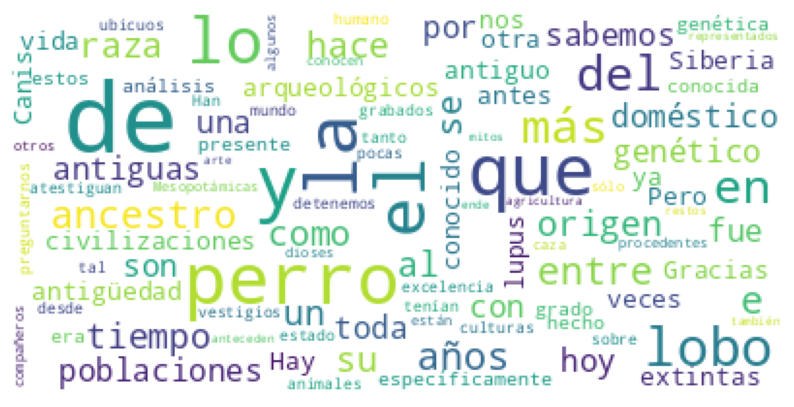

In [34]:
wordcloud = WordCloud(max_font_size=50,                            # tamaño de la fuente
                      max_words=100,                               # máximo de palabras en la nube
                      background_color="white").generate(texto)    # color de fondo y el método de generación

plt.figure(figsize=(10,10))                                        # tamaño del gráfico
plt.imshow(wordcloud)                                              # generación del gráfico
plt.axis("off")                                                    # para que no aparezcan los ejes
plt.show()

d. Realice otra nube cambiando algunos parámetros del código anterior. Por ejemplo, tamaño, número de palabras, etc. interpolation="bilinear"

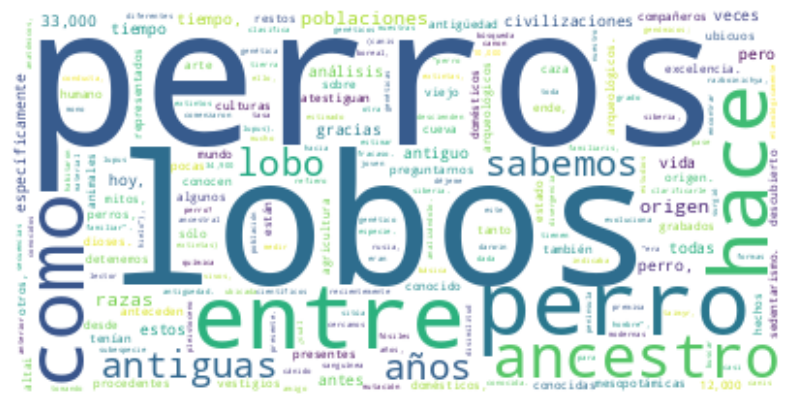

In [46]:
wordcloud = WordCloud(max_font_size=100,
                      max_words=200,
                      background_color="white",
                      ).generate_from_frequencies(frecuencias)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

2. Regresemos a la variable *texto* inicial. Observe que en el texto pueden aparecer carácteres que no son letras tales como:

- (.) Punto
- (,) Coma
- (@) Arroba
- (#) numeral
- (¿,?,!) Signos de admiración y de pregunta
- Entre otros.

¿En qué afectan estos signos al ejercicio anterior?

**Respuesta:**

Que si estan antes o despues de una letra, quedaran incluidos con la palabra, afectando el análisis de las palabras. Son irrelevantes para las tareas de procesamiento automático de texto, lo que dificultará la identificación de los temas importantes.

¿Cómo podría eliminar carácteres especiales en el *texto*?

**Respuesta**

Expresiones regulares

<FONT SIZE=5 COLOR="purple"> 2. LIBRERÍAS PARA PROCESAMIENTO DE LENGUAJE NATURAL PLN </FONT>

Actualmente, existen diferentes librería que se usan para hacer procesamiento de texto y aplicar metodologías de procesamiento de lenguaje natural en general (PLN)

- **NLTK** (https://www.nltk.org/): Es una librería desarrollada por Steven Bird y Edward Loper para el Procesamiento de Lenguaje Natural, principalmente en inglés, que tiene herramientas para trabajar con: corpus, recursos léxicos, algoritmos de procesamiento de PLN, etc.

- **SpaCy** (https://spacy.io/): Es una librería para el NLP incorpora funcionalidades como Tokenización, Lematización, PoS, NER, etc. en varios idiomas. A diferencia de NLTK que tienen fines de caracter didáctico, SpaCy es más aplicado en la solución de problemas reales.

- **Gensim** (https://radimrehurek.com/gensim/) Es una librería muy útil para vectorización de textos, topic modeling, LDA, etc. Preprocesamiento, entre otras aplicaciones y procesos.

 A continuación, un resumen y comparativas entre diferentes librerías

 <br>

<center><img src="https://st11.ning.com/topology/rest/1.0/file/get/2808360875?profile=RESIZE_1024x1024" alt="centered image" width="550" height="700"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://noeliagorod.com/2021/11/25/top-librerias-de-python-para-nlp-2/  </FONT> <figcaption></center>



<FONT SIZE=5 COLOR="purple"> 3. EXPRESIONES REGULARES </FONT>

- Es un modelo para búsqueda de coincidencias de texto.

- Es fundamental en la limpieza de texto para la eliminación de carácteres o búsquedas en texto.

- Podemos hacer búsqueda especificando el conjuntos de carácteres usando los corchetes [].

- Si usamos el símbolo "^" despues de "[" estaremos buscando los carácteres que no pertencen a la lista.

Veamos algunos ejemplos. Para profundizar en este tema y ver más posibilidades ver:

[*EXPRESIONES REGULARES* ▶ 🔎](https://developer.mozilla.org/es/docs/Web/JavaScript/Guide/Regular_expressions)



Iniciamos importante la librería *¨re*. Hay dos funciones claves:

1. ***findall***. Sirve para encontrar coincidencias de carácteres.

2- ***sub***. Sustituir carácteres por otros

In [47]:
import re

In [48]:
cadena = "El correo de Fabián Sánchez con código AP89504, es fabian.sanchez@urosario.edu.co y en twitter #PLN!!"

In [49]:
patron = "Fa"
re.findall(patron, cadena)
# Observe que se muestran todas las coincidencias de la cadena completa ya que esta dentro de las comilla "cadena"

['Fa']

**.** : punto --- cualquier carácter

**\s** : espacio en blanco
   
**\S** : cualquier carácter a excepción del espacio en blanco

In [50]:
patron = ".sa"
re.findall(patron, cadena)
# busca la cadena (cualquier elemento incluso el espacio) seguido de la "sa"

['.sa', 'osa']

In [51]:
patron = "\sFabián"
re.findall(patron, cadena)
# busca (espacio) más "Fabián" : observe que hay solo una coindicencia que corresponde a la palabra interna que tiene un espacio antes

[' Fabián']

In [52]:
patron = "\Sreo"
re.findall(patron, cadena)
# busca (espacio) más "Fabián" : observe que hay solo una coindicencia que corresponde a la palabra interna que tiene un espacio antes

['rreo']

"*" : indica la repetición de un carácter cero o más veces

"+" : indica la repetición de un carácter una o más veces

?   : Es el carácter o cuantificador *reacio*. Añadido a cualquiera de los anteriores se contará con la ocurrencia más corta posible.

In [53]:
patron = "Fabián*"
re.findall(patron, cadena)
# Buscar Fabia o Fabian o Fabiann ...

['Fabián']

In [54]:
patron = "Fabián+"
re.findall(patron, cadena)
# Buscar Fabian o Fabiann o Fabiannnn...

['Fabián']

Veamos los siguientes ejemplos

In [55]:
patron = "\Sn"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['án', 'án', 'on', 'an', 'an', 'en']

In [81]:
patron = "\S*n"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['Fabián', 'Sán', 'con', 'fabian.san', 'en']

In [82]:
patron = "\S+n"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['Fabián', 'Sán', 'con', 'fabian.san', 'en']

In [57]:
patron = "\S*?n"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['Fabián', 'Sán', 'con', 'fabian', '.san', 'en']

¿Cómo hacemos para extraer el correo de la oración?

In [92]:
patron = "\S*@\S*"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['fabian.sanchez@urosario.edu.co']

**[ ]** : cualquiera de los caracteres especificados

**[ ^ ]**  : al inicio de [] es la negación

In [62]:
patron = "[Fa]"
re.findall(patron, cadena)
# Busca las "F" y las "a", es decir, busca lo que esta adentro individualmente

['F', 'a', 'a', 'a', 'a', 'a']

In [63]:
patron = "[^Fa]"
re.findall(patron, cadena)
# Busca los otros caracteres que no son F o a

['E',
 'l',
 ' ',
 'c',
 'o',
 'r',
 'r',
 'e',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'b',
 'i',
 'á',
 'n',
 ' ',
 'S',
 'á',
 'n',
 'c',
 'h',
 'e',
 'z',
 ' ',
 'c',
 'o',
 'n',
 ' ',
 'c',
 'ó',
 'd',
 'i',
 'g',
 'o',
 ' ',
 'A',
 'P',
 '8',
 '9',
 '5',
 '0',
 '4',
 ',',
 ' ',
 'e',
 's',
 ' ',
 'f',
 'b',
 'i',
 'n',
 '.',
 's',
 'n',
 'c',
 'h',
 'e',
 'z',
 '@',
 'u',
 'r',
 'o',
 's',
 'r',
 'i',
 'o',
 '.',
 'e',
 'd',
 'u',
 '.',
 'c',
 'o',
 ' ',
 'y',
 ' ',
 'e',
 'n',
 ' ',
 't',
 'w',
 'i',
 't',
 't',
 'e',
 'r',
 ' ',
 '#',
 'P',
 'L',
 'N',
 '!',
 '!']

In [64]:
patron = "[Ff]abian"
re.findall(patron, cadena)
# Busca Fabian y fabian

['fabian']

***Expresiones importantes***

- "[A-Z0-9]"
- "[^A-Za-z0-9óáéíúñ]"

In [65]:
patron = "[A-Z]"
re.findall(patron, cadena)

['E', 'F', 'S', 'A', 'P', 'P', 'L', 'N']

In [67]:
patron = "[A-Z]+"
re.findall(patron, cadena)

['E', 'F', 'S', 'AP', 'PLN']

In [68]:
patron = "[A-Za-z]+"
re.findall(patron, cadena)

['El',
 'correo',
 'de',
 'Fabi',
 'n',
 'S',
 'nchez',
 'con',
 'c',
 'digo',
 'AP',
 'es',
 'fabian',
 'sanchez',
 'urosario',
 'edu',
 'co',
 'y',
 'en',
 'twitter',
 'PLN']

In [69]:
patron = "[A-Za-z0-9óáéíú]+"
re.findall(patron, cadena)

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 'es',
 'fabian',
 'sanchez',
 'urosario',
 'edu',
 'co',
 'y',
 'en',
 'twitter',
 'PLN']

Ahora bien, usaremos la instrucción *sub* para sustituir carácteres.

In [70]:
cadena2 = re.sub ("[^A-Za-z0-9óáéíúñ]+"," ",cadena)
cadena2

'El correo de Fabián Sánchez con código AP89504 es fabian sanchez urosario edu co y en twitter PLN '

¿Qué efecto tiene la expresión anterior?

**Respuesta**

La expresión `re.sub("[^A-Za-z0-9óáéíúñ]+", " ", cadena)` utiliza la función `re.sub()` del módulo `re` (regular expression) en Python para realizar una sustitución en la cadena `cadena`.

Aquí te explico el efecto de esta expresión:

1. `re.sub()`: Esta función se utiliza para realizar sustituciones basadas en expresiones regulares. Toma tres argumentos: el patrón de búsqueda, la cadena de reemplazo y la cadena en la que se realizarán las sustituciones.

2. `[^A-Za-z0-9óáéíúñ]+`: Este es el patrón de búsqueda. Aquí se utiliza una expresión regular para buscar todos los caracteres que no sean letras mayúsculas o minúsculas del alfabeto inglés (`A-Z` y `a-z`), ni números (`0-9`), ni las letras con acentos del español (`óáéíúñ`), y que se presenten una o más veces en la cadena (`+`). El uso del `^` dentro de los corchetes invierte la selección, es decir, busca cualquier carácter que NO esté en la lista mencionada.

3. `" "`: Este es el texto de reemplazo. Aquí se especifica que cualquier coincidencia encontrada en la cadena `cadena` será reemplazada por un espacio en blanco.

Entonces, el efecto de esta expresión es eliminar todos los caracteres que no sean letras mayúsculas o minúsculas del alfabeto inglés, ni números, ni las letras con acentos del español, y en su lugar, se inserta un espacio en blanco en cada una de las ubicaciones de las coincidencias encontradas. Esto resultará en una nueva cadena donde solo se mantendrán los caracteres alfanuméricos y los acentos del español, y todo lo demás se reemplazará por espacios en blanco.

<FONT SIZE=5 COLOR="purple"> 4. TOKENIZACIÓN </FONT>

- Es el proceso de dividir las cadenas de texto de un documento en piezas más pequeñas que se denominan *tokens*.

- La librería NTKL tiene funciones para hacer la tokenización de textos.

Importaremos la librería al espacio de trabajo y la función *word_tokenize*

In [71]:
import nltk
# separa cuando encuentra espacio y carácteres especiales
from nltk import word_tokenize
# separa cuando encuentra espacio y punto
from nltk.tokenize import wordpunct_tokenize

In [72]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Veamos dos ejemplos con las cadenas de texto que hemos abordado.

In [73]:
words_cadena = nltk.word_tokenize(cadena)
words_cadena

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 ',',
 'es',
 'fabian.sanchez',
 '@',
 'urosario.edu.co',
 'y',
 'en',
 'twitter',
 '#',
 'PLN',
 '!',
 '!']

In [74]:
nltk.wordpunct_tokenize(cadena)

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 ',',
 'es',
 'fabian',
 '.',
 'sanchez',
 '@',
 'urosario',
 '.',
 'edu',
 '.',
 'co',
 'y',
 'en',
 'twitter',
 '#',
 'PLN',
 '!!']

In [75]:
words_texto = nltk.word_tokenize(texto)
words_texto

['Los',
 'perros',
 'son',
 'los',
 'animales',
 'domésticos',
 'ubicuos',
 'por',
 'excelencia',
 '.',
 'Han',
 'estado',
 'presentes',
 'en',
 'el',
 'mundo',
 'humano',
 'desde',
 'hace',
 'tanto',
 'tiempo',
 ',',
 'que',
 'pocas',
 'veces',
 'nos',
 'detenemos',
 'a',
 'preguntarnos',
 'sobre',
 'su',
 'origen',
 '.',
 'Las',
 'culturas',
 'más',
 'antiguas',
 'conocidas',
 'ya',
 'tenían',
 'perros',
 ',',
 'tal',
 'y',
 'como',
 'atestiguan',
 'sus',
 'vestigios',
 'arqueológicos',
 '.',
 'Hay',
 'grabados',
 'de',
 'perros',
 'procedentes',
 'de',
 'civilizaciones',
 'Mesopotámicas',
 'con',
 'más',
 'de',
 '12,000',
 'años',
 'de',
 'antigüedad',
 'y',
 'en',
 'todas',
 'las',
 'civilizaciones',
 'antiguas',
 'se',
 'conocen',
 'perros',
 'domésticos',
 ',',
 'algunos',
 'compañeros',
 'de',
 'caza',
 'otros',
 ',',
 'hechos',
 'dioses',
 '.',
 'Y',
 'no',
 'sólo',
 'están',
 'representados',
 'en',
 'arte',
 'antiguo',
 'y',
 'los',
 'mitos',
 ',',
 'también',
 'hay',
 'resto

<FONT SIZE=5 COLOR="purple"> 5. STOP WORDS </FONT>

- Son palabras que no aportan al significado de la oraciones : preprosiciones, conjunciones, adverbios, artículos, etc.

- NLTK tiene para una serie de idiomas un listado de Stop Words.

- Podemos crear nuestra propia bolsa de palabras dependiendo del lenguaje y contexto.


In [76]:
from nltk.corpus import stopwords

Bolsa de palabras de inglés

In [77]:
print(set(stopwords.words("english")))

{'no', 'into', 'other', 'been', 'once', 'these', 'under', 'needn', 'below', 'any', 'but', 'what', 'on', 'hers', 've', 'with', 'yourself', 'to', 'o', "mustn't", 'are', 'should', 'herself', 'd', 'doing', 'how', 't', 'it', "wouldn't", 'a', 'those', 'out', 'against', "haven't", 'an', 'doesn', 'after', "aren't", 'were', 'ours', 'themselves', 'he', 'can', 'just', 'or', 'nor', 'during', 'myself', 'very', "mightn't", 'don', "couldn't", 'here', 'we', 'until', 'why', "doesn't", 'only', 'yours', 'mustn', "weren't", 'her', 'than', 'mightn', 'your', 'before', 'at', 'his', "you've", 'now', 'the', 'there', 'shouldn', "you'll", 'more', 'will', 'does', 'if', "you'd", 'through', 'himself', 'ma', 'not', 'for', 'you', 'be', 'and', 'all', 'wasn', 'me', 'so', 'about', 'my', "that'll", 'that', 'ourselves', 'our', 'did', 'him', 'couldn', 'ain', 'shan', 'am', 'm', 'whom', 'has', 'had', 'having', 'few', 'was', 'off', 'i', 'again', "she's", 'who', "don't", "wasn't", 'from', "needn't", 'have', 'their', 'down', 'i

Bolsa de palabras en español

In [78]:
print(set(stopwords.words("spanish")))

{'quien', 'tendríais', 'e', 'nada', 'hemos', 'algunos', 'habrás', 'o', 'tenidas', 'vuestro', 'se', 'sentidas', 'habríamos', 'eso', 'sea', 'nuestra', 'para', 'tenemos', 'estuve', 'qué', 'su', 'habidas', 'ha', 'tenía', 'estén', 'serían', 'tus', 'vuestra', 'un', 'mí', 'estuvierais', 'estaba', 'nuestro', 'serán', 'estad', 'estoy', 'tengan', 'hayan', 'tenéis', 'tuvieseis', 'estaríamos', 'sentid', 'has', 'algunas', 'por', 'hubierais', 'que', 'fueran', 'todos', 'estaréis', 'hayas', 'hubisteis', 'seréis', 'y', 'sentida', 'estuviésemos', 'cual', 'seríamos', 'tendrás', 'tuvierais', 'habremos', 'fuesen', 'sentido', 'estamos', 'mía', 'tuviésemos', 'será', 'estuvieran', 'estaríais', 'ella', 'vosotros', 'uno', 'le', 'del', 'estados', 'tendré', 'hasta', 'habías', 'estuviera', 'ante', 'estará', 'estarían', 'tú', 'tuviste', 'serás', 'estuvo', 'nuestros', 'estuviese', 'tendrías', 'estarán', 'habidos', 'tengamos', 'nos', 'vosotras', 'suyo', 'habíamos', 'fuésemos', 'fuese', 'hay', 'antes', 'tuviéramos', '

Veamos un ejemplo

In [79]:
doc = "Un radar multa a Fabian Sanchez por conducir demasiado rapido en la autopista"
words = nltk.word_tokenize(doc)
for word in words:
        if word in stopwords.words('spanish'):
            print (word)

a
por
en
la


***
***
#Tarea

Un exel con 10 twits.

t1: __texto__@__texto__#__texto__

Extraer el usuario y el twit


@usuario + # twit